In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression

In [2]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Descriptive Statistics

In [3]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
data.describe()
##shows no null values
##categories:age,sex,smoker,region
##numerical:bmi,children(descrete),charges

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
data.shape

(1338, 7)

# PERFORMING EDA

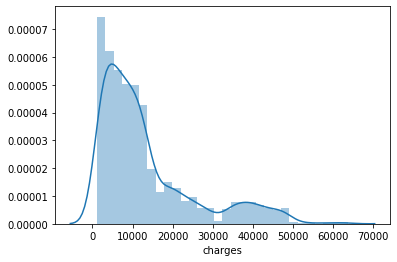

In [8]:
sns.distplot(data['charges'])
##it is right skewed
## lets check for the log of it

# preassumptions
   
   # 1.Normal distribution of target
   # 2.Linear realtionship
   # 3.No multicollinearity

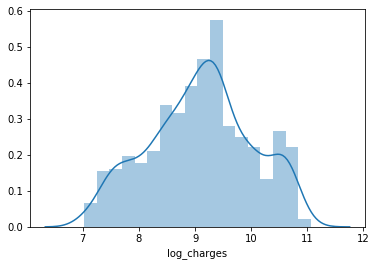

In [107]:
data['log_charges']=np.log(data['charges'])
sns.distplot(data['log_charges'])
## the normality of target is the must condition as we check every other variable with this, this could provide 
## us wrong results if not checked and done with normality

In [10]:
data1=data.drop(['charges'],axis=1)
## dropping the charges and creating a new df

In [11]:
data1.head()

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [23]:
data1.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
log_charges    0
dtype: int64

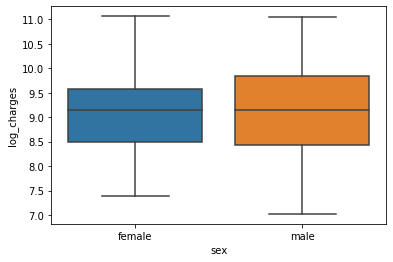

In [12]:
sns.boxplot(x='sex',y='log_charges',data=data1)
## shows a low impact on our target

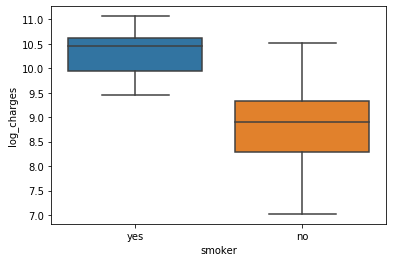

In [13]:
sns.boxplot(x='smoker',y='log_charges',data=data1)
## has a greater impact on target

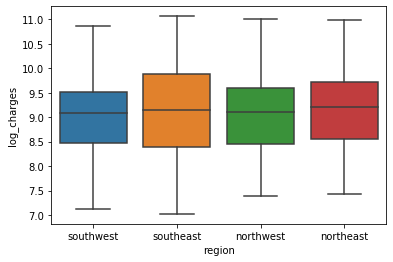

In [14]:
sns.boxplot(x='region',y='log_charges',data=data1)
## region has lesser impact on target

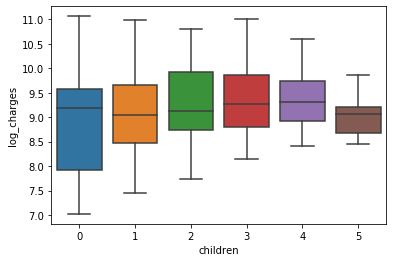

In [15]:
sns.boxplot(x='children',y='log_charges',data=data1)
## shows children has great impact on our target

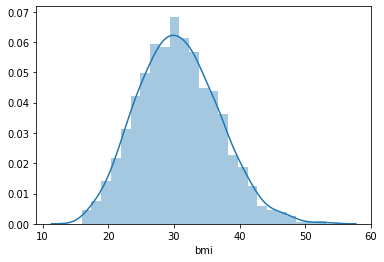

In [24]:
sns.distplot(data1['bmi'])

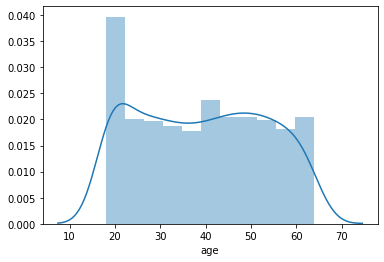

In [25]:
sns.distplot(data1['age'])

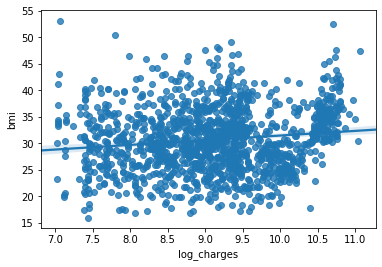

In [16]:
sns.regplot(x='log_charges',y='bmi',data=data1)
## not that great linearity but can be considered

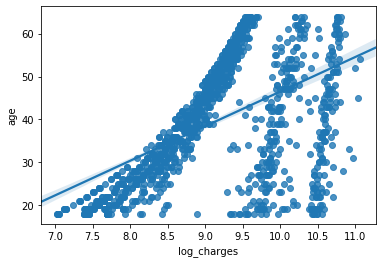

In [17]:
sns.regplot(x='log_charges',y='age',data=data1)
## has a linear relationship between age and our target
## so we must consider this in our reg.

# checking for multicollinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data1[['age','bmi']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,7.457006,age
1,7.457006,bmi


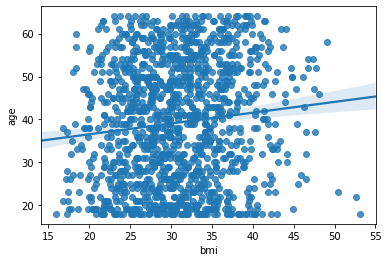

In [19]:
sns.regplot(x='bmi',y='age',data=data1)

In [20]:
data1.corr()

,age,bmi,children,log_charges
age,1.000000,0.109272,0.042469,0.527834
bmi,0.109272,1.000000,0.012759,0.132669
children,0.042469,0.012759,1.000000,0.161336
log_charges,0.527834,0.132669,0.161336,1.000000


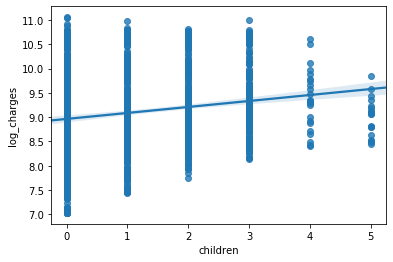

In [21]:
sns.regplot(x='children',y='log_charges',data=data1)

In [26]:
data_cleaned=data1.reset_index(drop=True)

In [28]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [30]:
data_cleaned.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'log_charges'],
      dtype=object)

In [27]:
data_cleaned.describe()

,age,bmi,children,log_charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,9.098659
std,14.049960,6.098187,1.205493,0.919527
min,18.000000,15.960000,0.000000,7.022756
25%,27.000000,26.296250,0.000000,8.463853
50%,39.000000,30.400000,1.000000,9.146552
75%,51.000000,34.693750,2.000000,9.719558
max,64.000000,53.130000,5.000000,11.063045


# Dummy creation

In [34]:
data_with_dummies=pd.get_dummies(data_cleaned,drop_first=True)
data_with_dummies

,age,bmi,children,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,0,1,0,0,1
1,18,33.770,1,7.453302,1,0,0,1,0
2,28,33.000,3,8.400538,1,0,0,1,0
3,33,22.705,0,9.998092,1,0,1,0,0
4,32,28.880,0,8.260197,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,1,0,1,0,0
1334,18,31.920,0,7.698927,0,0,0,0,0
1335,18,36.850,0,7.396233,0,0,0,1,0
1336,21,25.800,0,7.604867,0,0,0,0,1


In [35]:
data_with_dummies.columns

Index(['age', 'bmi', 'children', 'log_charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables1=data_with_dummies[['age','bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']]
vif1=pd.DataFrame()
vif1['VIF']=[variance_inflation_factor(variables1.values,i) for i in range(variables1.shape[1])]
vif1['Features']=variables1.columns
vif1

,VIF,Features
0,7.686965,age
1,11.358443,bmi
2,1.809930,children
3,2.003185,sex_male
4,1.261233,smoker_yes
5,1.890281,region_northwest
6,2.265564,region_southeast
7,1.960745,region_southwest


In [38]:
data_with_dummies1=pd.get_dummies(data_cleaned,drop_first=False)
data_with_dummies1

,age,bmi,children,log_charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,1,0,0,1,0,0,0,1
1,18,33.770,1,7.453302,0,1,1,0,0,0,1,0
2,28,33.000,3,8.400538,0,1,1,0,0,0,1,0
3,33,22.705,0,9.998092,0,1,1,0,0,1,0,0
4,32,28.880,0,8.260197,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,0,1,1,0,0,1,0,0
1334,18,31.920,0,7.698927,1,0,1,0,1,0,0,0
1335,18,36.850,0,7.396233,1,0,1,0,0,0,1,0
1336,21,25.800,0,7.604867,1,0,1,0,0,0,0,1


In [39]:
data_with_dummies1.columns

Index(['age', 'bmi', 'children', 'log_charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables2=data_with_dummies1[['age', 'bmi', 'children', 'log_charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
vif2=pd.DataFrame()
vif2['VIF']=[variance_inflation_factor(variables2.values,i) for i in range(variables2.shape[1])]
vif2['Features']=variables2.columns
vif2

C:\Users\Madhan Dasari\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Features
0,2.219991,age
1,1.140535,bmi
2,1.080852,children
3,4.309374,log_charges
4,inf,sex_female
5,inf,sex_male
6,inf,smoker_no
7,inf,smoker_yes
8,inf,region_northeast
9,inf,region_northwest


# Reaarange the columns 

In [44]:
data_with_dummies.columns

Index(['age', 'bmi', 'children', 'log_charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [146]:
cols=['log_charges', 'bmi','age','children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']

In [147]:
data_preprocessed=data_with_dummies[cols]

In [148]:
data_preprocessed.head()

,log_charges,bmi,age,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,9.734176,27.900000,19,0,0,1,0,0,1
1,7.453302,33.770000,18,1,1,0,0,1,0
2,8.400538,33.000000,28,3,1,0,0,1,0
3,9.998092,22.705000,33,0,1,0,1,0,0
4,8.260197,28.880000,32,0,1,0,1,0,0


# Linear Regression Model

# Declare inputs and targets

In [149]:
target=data_preprocessed['log_charges']
#inputs=data_preprocessed.drop(['log_charges'],axis=1) for all inputs
inputs=data_preprocessed[['children','bmi','age','sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']]

# SCale the data

In [150]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [151]:
inputs_scaled=scaler.transform(inputs)

# Train Test Split

In [152]:
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,target,test_size=0.2,random_state=365)

# create Regression

In [153]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
y_hat=reg.predict(x_train)

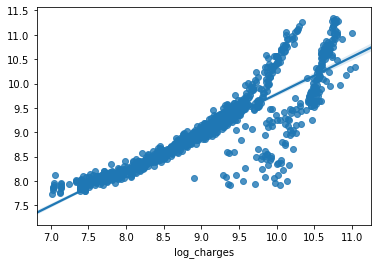

In [155]:
sns.regplot(y_train,y_hat)

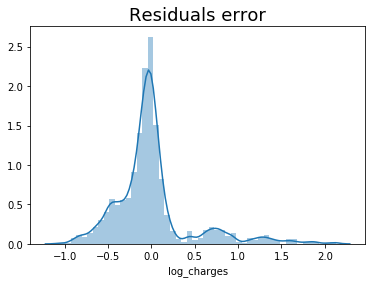

In [156]:
plt.title("Residuals error",size=18)
sns.distplot(y_train-y_hat)

In [157]:
reg.score(x_train,y_train)

0.7640353044847054

# Finding weights and bias

In [158]:
reg.intercept_

9.103965238265891

In [159]:
reg.coef_

array([ 0.12106042,  0.07838006,  0.48301939, -0.0314788 ,  0.6419965 ,
       -0.03174417, -0.08039805, -0.06405517])

In [160]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['weights']=reg.coef_
reg_summary

,Features,weights
0,children,0.121060
1,bmi,0.078380
2,age,0.483019
3,sex_male,-0.031479
4,smoker_yes,0.641996
5,region_northwest,-0.031744
6,region_southeast,-0.080398
7,region_southwest,-0.064055


# Testing

In [161]:
y_hat_test=reg.predict(x_test)

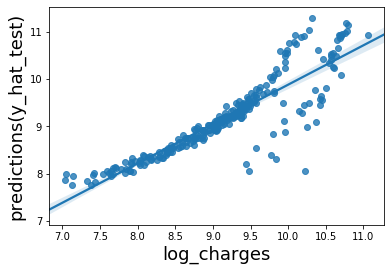

In [162]:
plt.xlabel("targets(y_test)",size=18)
plt.ylabel("predictions(y_hat_test)",size=18)
sns.regplot(y_test,y_hat_test)
plt.show()
##alpha in matplotlib shows the opacity of the points

In [163]:
df_per=pd.DataFrame(np.exp(y_hat_test),columns=['prediction'])
df_per.head()

,prediction
0,13438.964145
1,3146.658271
2,3151.920563
3,9036.264975
4,14451.020284


In [164]:
df_per['target']=np.exp(y_test)
df_per
## there are so many missing values

,prediction,target
0,13438.964145,nan
1,3146.658271,nan
2,3151.920563,nan
3,9036.264975,nan
4,14451.020284,nan
5,9533.525201,nan
6,2991.449059,nan
7,8419.277786,nan
8,5473.529045,nan
9,24198.452942,nan


In [165]:
y_test

1236    9.578440
1060    7.591651
636     7.904376
347     9.028154
259    10.426744
733     9.153479
972     7.835112
647     9.018245
42      8.743927
739    10.705163
184     8.953049
444    10.170048
135     7.675862
193     9.396350
473     9.946489
1066    9.102553
673     8.729934
337     9.542350
695     8.071295
802     7.651158
735     9.167839
57     10.442993
152     8.753741
675     8.884996
1176   10.081117
581     7.402185
1297    8.375731
741     9.811728
172     7.435318
89      9.313130
96      9.401400
845    10.714617
699     8.160693
151     8.960549
758     8.599460
403     9.236930
70      9.715818
407     9.052478
895     9.477607
998     8.787487
1151    9.412125
1195    9.843669
766     8.995012
276     7.938694
137     7.623488
338    10.643497
734     9.547328
749     8.026990
516    10.230064
880     8.144117
769     8.844083
127     9.173110
433     9.444479
722     9.471116
366     9.505266
101     8.201136
98     10.017381
1292    7.323398
681     7.1246

In [166]:
y_test=y_test.reset_index(drop=True)
y_test

0      9.578440
1      7.591651
2      7.904376
3      9.028154
4     10.426744
5      9.153479
6      7.835112
7      9.018245
8      8.743927
9     10.705163
10     8.953049
11    10.170048
12     7.675862
13     9.396350
14     9.946489
15     9.102553
16     8.729934
17     9.542350
18     8.071295
19     7.651158
20     9.167839
21    10.442993
22     8.753741
23     8.884996
24    10.081117
25     7.402185
26     8.375731
27     9.811728
28     7.435318
29     9.313130
30     9.401400
31    10.714617
32     8.160693
33     8.960549
34     8.599460
35     9.236930
36     9.715818
37     9.052478
38     9.477607
39     8.787487
40     9.412125
41     9.843669
42     8.995012
43     7.938694
44     7.623488
45    10.643497
46     9.547328
47     8.026990
48    10.230064
49     8.144117
50     8.844083
51     9.173110
52     9.444479
53     9.471116
54     9.505266
55     8.201136
56    10.017381
57     7.323398
58     7.124688
59     9.097276
60     8.796356
61     8.425701
62    10

In [167]:
df_per['target']=np.exp(y_test)
df_per


,prediction,target
0,13438.964145,14449.854400
1,3146.658271,1981.581900
2,3151.920563,2709.111900
3,9036.264975,8334.457550
4,14451.020284,33750.291800
5,9533.525201,9447.250350
6,2991.449059,2527.818650
7,8419.277786,8252.284300
8,5473.529045,6272.477200
9,24198.452942,44585.455870


In [168]:
df_per['Residual']=df_per['target']-df_per['prediction']
df_per

,prediction,target,Residual
0,13438.964145,14449.854400,1010.890255
1,3146.658271,1981.581900,-1165.076371
2,3151.920563,2709.111900,-442.808663
3,9036.264975,8334.457550,-701.807425
4,14451.020284,33750.291800,19299.271516
5,9533.525201,9447.250350,-86.274851
6,2991.449059,2527.818650,-463.630409
7,8419.277786,8252.284300,-166.993486
8,5473.529045,6272.477200,798.948155
9,24198.452942,44585.455870,20387.002928


In [169]:
df_per['difference%']=np.absolute((df_per['Residual']/df_per['target'])*100)

In [170]:
df_per

,prediction,target,Residual,difference%
0,13438.964145,14449.854400,1010.890255,6.995851
1,3146.658271,1981.581900,-1165.076371,58.795267
2,3151.920563,2709.111900,-442.808663,16.345160
3,9036.264975,8334.457550,-701.807425,8.420553
4,14451.020284,33750.291800,19299.271516,57.182532
5,9533.525201,9447.250350,-86.274851,0.913227
6,2991.449059,2527.818650,-463.630409,18.341126
7,8419.277786,8252.284300,-166.993486,2.023603
8,5473.529045,6272.477200,798.948155,12.737362
9,24198.452942,44585.455870,20387.002928,45.725680


In [171]:
df_per.describe()

,prediction,target,Residual,difference%
count,268.000000,268.000000,268.000000,268.000000
mean,13960.625974,13312.818747,-647.807226,24.711924
std,14759.734578,11769.704586,8397.401232,30.078359
min,2351.637674,1137.011000,-50856.719340,0.020749
25%,5130.308043,5234.338375,-1100.438578,4.906075
50%,9022.240062,9526.937700,-344.116938,11.642415
75%,13518.736857,15977.416237,561.468990,32.693127
max,81041.656040,63770.428010,24560.826231,168.483770


In [172]:
df_per.sort_values(by=['difference%'])

,prediction,target,Residual,difference%
262,9303.823611,9301.893550,-1.930061,0.020749
181,9612.646804,9617.662450,5.015646,0.052150
196,6307.613921,6313.759000,6.145079,0.097328
36,16610.387143,16577.779500,-32.607643,0.196695
243,4708.865868,4719.736550,10.870682,0.230324
102,5106.069048,5125.215700,19.146652,0.373577
139,8761.501283,8798.593000,37.091717,0.421564
156,5328.025011,5354.074650,26.049639,0.486539
69,11874.523935,11938.255950,63.732015,0.533847
81,7283.847925,7243.813600,-40.034325,0.552669


In [173]:
#pd.options.display.max_rows=999
#pd.set_option('display.float_format', lambda x: '%2f' %x)
#df_per.sort_values(by=['difference%'])
